# TF Neural Net

In [39]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

In [4]:
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [6]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[91.31535577],
       [80.7920151 ],
       [40.29978307],
       [35.72243428],
       [95.28767147]])

In [7]:
a = tf.placeholder(tf.float32)

In [8]:
b = tf.placeholder(tf.float32)

In [9]:
add_op = a + b

In [10]:
mul_op = a * b

In [14]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a: rand_a, b: rand_b})
    print(add_result)
    print('\n')
    mult_result = sess.run(mul_op, feed_dict={a: rand_a, b: rand_b})
    print(mult_result)

[[142.95522  148.38211   94.16277  108.46752  159.84305 ]
 [164.1817   111.48864  170.15332  152.94641   99.78591 ]
 [ 95.72254   75.51298   58.48902  118.859955 136.84811 ]
 [ 58.9578    44.07858   96.07728  108.62171   63.346317]
 [163.8183   147.07442  100.13612  109.0746   113.98442 ]]


[[4715.512   5211.0713   260.0134  1566.2561  6257.631  ]
 [6737.2207  2480.042   7219.6797  5829.4985  1534.555  ]
 [2233.5251  1419.0841   733.0224  3165.9578  3890.8765 ]
 [ 830.02386  298.50177 2156.022   2604.1396   986.79236]
 [6530.1245  4934.6387   461.99786 1313.7239  1781.5691 ]]


## Example NN

In [15]:
n_features = 10
n_dense_neurons = 3

In [16]:
x = tf.placeholder(tf.float32, (None, n_features))

In [25]:
W = tf.Variable(tf.random_normal((n_features, n_dense_neurons)))
b = tf.Variable(tf.ones(n_dense_neurons))

In [26]:
xW = tf.matmul(x, W)

In [27]:
z = tf.add(xW, b)

In [28]:
a = tf.sigmoid(z)

In [29]:
init = tf.global_variables_initializer()

In [30]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x: np.random.random((1, n_features))})

In [31]:
print(layer_out)

[[0.25227907 0.9167927  0.04905915]]


## Simple Regression Example

In [32]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [33]:
x_data

array([-1.13869902,  1.11146125,  1.13625093,  1.99175854,  3.47927521,
        5.38265995,  7.79942864,  9.12557016,  8.82339114,  9.88335803])

In [34]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [35]:
y_label

array([ 0.41186709,  0.5849351 ,  1.0749565 ,  1.98663632,  4.8574204 ,
        6.49235324,  7.17744793,  8.23308089,  8.66259572, 10.46978601])

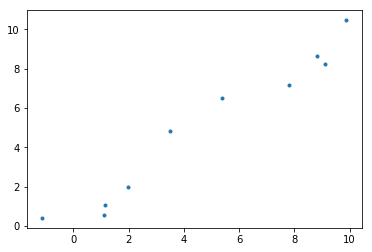

In [42]:
plt.plot(x_data, y_label, ".")

y = mx + b

In [44]:
np.random.rand(2)

array([0.2091615 , 0.65992452])

In [45]:
m = tf.Variable(0.21)
b = tf.Variable(0.87)

In [46]:
error = 0
for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y - y_hat)**2

In [47]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [48]:
init = tf.global_variables_initializer()

In [55]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m, b])

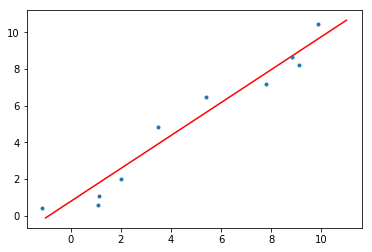

In [56]:
x_test = np.linspace(-1, 11, 10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test, y_pred_plot, "r")
plt.plot(x_data, y_label, ".")